In [1]:
import dlib
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
image = cv2.imread('DiCaprio.jpg')
face_detection = face_detector(image, 1)

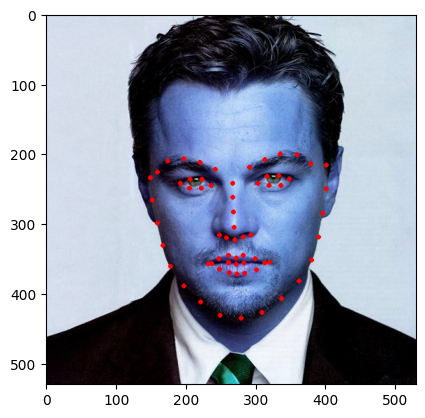

In [3]:
for face in face_detection:
  points = points_detector(image, face)
  for point in points.parts():
    cv2.circle(image, (point.x, point.y), 2, (255,0,0), 2)
plt.imshow(image);

In [4]:
points_list = []
for n in range(0, 68):
    x = points.part(n).x
    y = points.part(n).y
    points_list+=[(x, y)]
points = np.array(points_list, np.int32)

In [5]:
points.shape

(68, 2)

convexhull will create the contour of those 68 points and return us the new array

In [6]:
convexhull = cv2.convexHull(points)

In [7]:
convexhull.shape

(21, 1, 2)

(530, 530)

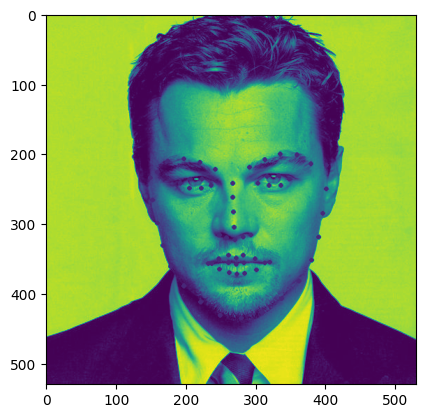

In [8]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)
img_gray.shape

In [9]:
mask = np.zeros_like(img_gray)
mask.shape

(530, 530)

In [10]:
cv2.fillConvexPoly(mask, convexhull, 255).shape

(530, 530)

## Implement all the functions explained above

In [11]:
img = cv2.imread("photo.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(img_gray)
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
faces = face_detector(img_gray)

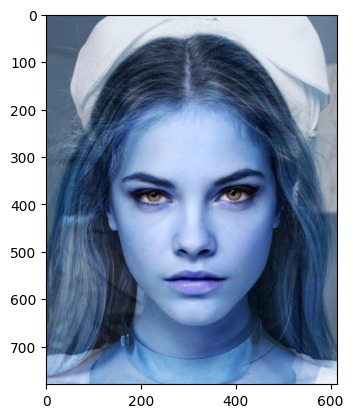

In [12]:
for face in faces:
    points = points_detector(img_gray, face)
    points_list = []
    for n in range(0, 68):
        x = points.part(n).x
        y = points.part(n).y
        points_list+=[(x, y)]

    points = np.array(points_list, np.int32)
    convexhull = cv2.convexHull(points)
    #cv2.polylines(img, [convexhull], True, (255, 0, 0), 3)
    cv2.fillConvexPoly(mask, convexhull, 255)
    face_image_1 = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(img);

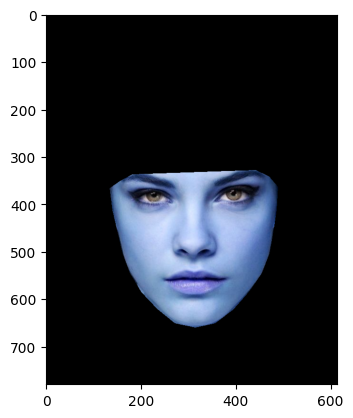

In [13]:
plt.imshow(face_image_1);

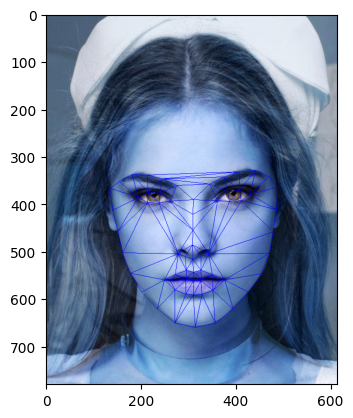

In [14]:
rect = cv2.boundingRect(convexhull)
subdiv = cv2.Subdiv2D(rect)
subdiv.insert(points_list)
triangles = subdiv.getTriangleList()
triangles = np.array(triangles, dtype=np.int32)
for t in triangles:
  pt1 = (t[0], t[1])
  pt2 = (t[2], t[3])
  pt3 = (t[4], t[5])
  
  cv2.line(img, pt1, pt2, (0, 0, 255), 1)
  cv2.line(img, pt2, pt3, (0, 0, 255), 1)
  cv2.line(img, pt1, pt3, (0, 0, 255), 1)
  
plt.imshow(img);


In [15]:
rect = cv2.boundingRect(convexhull)
subdiv = cv2.Subdiv2D(rect)
subdiv.insert(points_list)
triangles = subdiv.getTriangleList()
triangles = np.array(triangles, dtype=np.int32)

triangles_id = []
def index_nparray(nparray):
    index = None
    for num in nparray[0]:
        index = num
        break
    return index
for t in triangles:
  pt1 = (t[0], t[1])
  pt2 = (t[2], t[3])
  pt3 = (t[4], t[5])

  id_pt1 = np.where((points == pt1).all(axis=1))
  id_pt1 = index_nparray(id_pt1)
  id_pt2 = np.where((points == pt2).all(axis=1))
  id_pt2 = index_nparray(id_pt2)
  id_pt3 = np.where((points == pt3).all(axis=1))
  id_pt3 = index_nparray(id_pt3)

  if id_pt1 is not None and id_pt2 is not None and id_pt3 is not None:
    triangle = [id_pt1, id_pt2, id_pt3]
    triangles_id.append(triangle)

In [16]:
len(triangles_id)

111

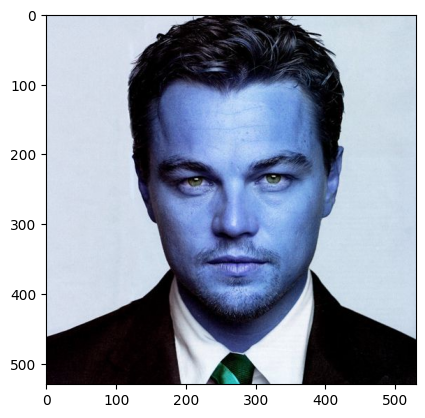

In [17]:
img2 = cv2.imread("DiCaprio.jpg")

img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

faces2 = face_detector(img2_gray)
for face in faces2:
    points_predict2 = points_detector(img2_gray, face)
    points_list2 = []
    for n in range(0, 68):
        x = points_predict2.part(n).x
        y = points_predict2.part(n).y
        points_list2.append((x, y))
    points2 = np.array(points_list2, np.int32)
    convexhull2 = cv2.convexHull(points2)

plt.imshow(img2)

In [18]:
len(triangles_id)

111

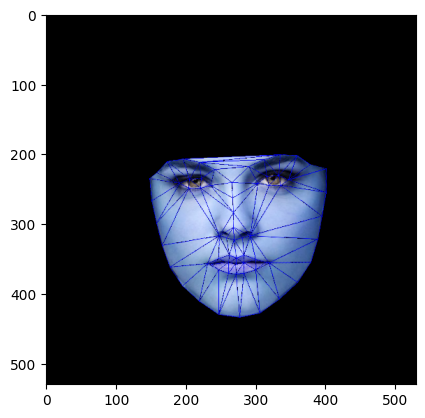

In [19]:
img2_new_face = np.zeros_like(img2, np.uint8)
for triangle_index in triangles_id:

    tr1_pt1 = points_list[triangle_index[0]]
    tr1_pt2 = points_list[triangle_index[1]]
    tr1_pt3 = points_list[triangle_index[2]]
    triangle1 = np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)
    rect1 = cv2.boundingRect(triangle1)
    (x1, y1, w1, h1) = rect1
    cropped_triangle = img[y1: y1 + h1, x1: x1 + w1]
    cropped_tr1_mask = np.zeros((h1, w1), np.uint8)
    points = np.array([[tr1_pt1[0] - x1, tr1_pt1[1] - y1],
                      [tr1_pt2[0] - x1, tr1_pt2[1] - y1],
                      [tr1_pt3[0] - x1, tr1_pt3[1] - y1]], np.int32)
    cv2.fillConvexPoly(cropped_tr1_mask, points, 255)
    cropped_triangle = cv2.bitwise_and(cropped_triangle, cropped_triangle,
                                       mask=cropped_tr1_mask)

    tr2_pt1 = points_list2[triangle_index[0]]
    tr2_pt2 = points_list2[triangle_index[1]]
    tr2_pt3 = points_list2[triangle_index[2]]
    triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)
    rect2 = cv2.boundingRect(triangle2)
    (x2, y2, w2, h2) = rect2
    cropped_triangle2 = img2[y2: y2 + h2, x2: x2 + w2]
    cropped_tr2_mask = np.zeros((h2, w2), np.uint8)
    points2 = np.array([[tr2_pt1[0] - x2, tr2_pt1[1] - y2],
                       [tr2_pt2[0] - x2, tr2_pt2[1] - y2],
                       [tr2_pt3[0] - x2, tr2_pt3[1] - y2]], np.int32)
    cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)
    cropped_triangle2 = cv2.bitwise_and(cropped_triangle2, cropped_triangle2,
                                       mask=cropped_tr2_mask)

    points = np.float32(points)
    points2 = np.float32(points2)
    M = cv2.getAffineTransform(points, points2)
    warped_triangle = cv2.warpAffine(cropped_triangle, M, (w2, h2))
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask)


    img2_new_face_rect_area = img2_new_face[y2: y2 + h2, x2: x2 + w2]
    img2_new_face_rect_area_gray = cv2.cvtColor(img2_new_face_rect_area, cv2.COLOR_BGR2GRAY)
    
    _, mask_triangles_designed = cv2.threshold(img2_new_face_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV)
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=mask_triangles_designed)

    img2_new_face_rect_area = cv2.add(img2_new_face_rect_area, warped_triangle)
    img2_new_face[y2: y2 + h2, x2: x2 + w2] = img2_new_face_rect_area
plt.imshow(img2_new_face)

In [20]:
img2_face_mask = np.zeros_like(img2_gray)
img2_head_mask = cv2.fillConvexPoly(img2_face_mask, convexhull2, 255)
img2_face_mask = cv2.bitwise_not(img2_head_mask)

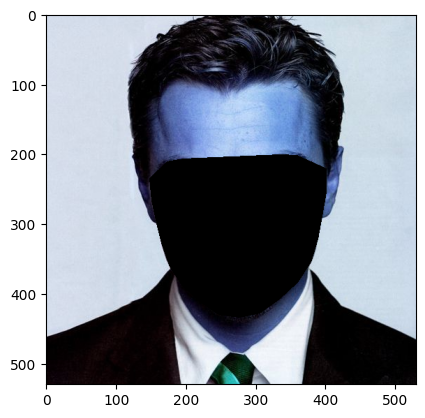

In [21]:
img2_noface = cv2.bitwise_and(img2, img2, mask=img2_face_mask)
plt.imshow(img2_noface)

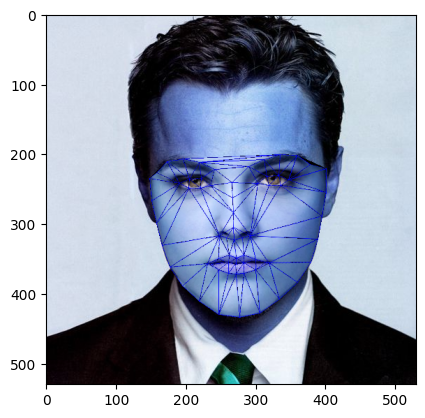

In [22]:
result = cv2.add(img2_noface, img2_new_face)
plt.imshow(result)

In [23]:
(x3, y3, w3, h3) = cv2.boundingRect(convexhull2)
center_face = (int((x3 + x3 + w3) / 2), int((y3 + y3 + h3) / 2))

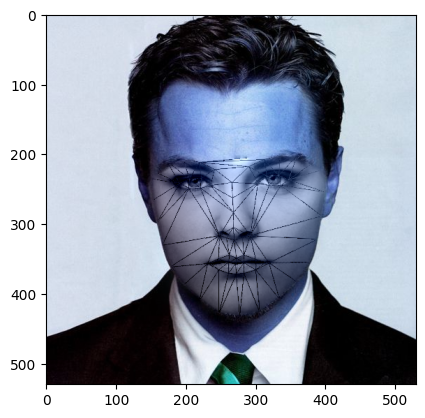

In [24]:
#removing the face from the img2
img2_face_mask = np.zeros_like(img2_gray)
img2_head_mask = cv2.fillConvexPoly(img2_face_mask, convexhull2, 255)
img2_face_mask = cv2.bitwise_not(img2_head_mask)
img2_noface = cv2.bitwise_and(img2, img2, mask=img2_face_mask)


result = cv2.add(img2_noface, img2_new_face)

#cloning face into the img2
(x3, y3, w3, h3) = cv2.boundingRect(convexhull2)
center_face = (int((x3 + x3 + w3) / 2), int((y3 + y3 + h3) / 2))
seamlessclone = cv2.seamlessClone(result, img2, img2_head_mask, center_face, cv2.MONOCHROME_TRANSFER)

plt.imshow(seamlessclone);

In [25]:
import os

In [26]:
os.getcwd()

'd:\\Python Project\\Face swap'

In [27]:
os.listdir()

['app.py',
 'config.py',
 'demo.txt',
 'DiCaprio.jpg',
 'face_swap2.ipynb',
 'face_swap_app',
 'image.jpg',
 'images',
 'img.jpg',
 'photo.jpg',
 'requirements.txt',
 'shape_predictor_68_face_landmarks.dat',
 'static',
 'templates',
 'venv']